In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [1]:
dpath = "data\\pns-data-1024\\"

In [2]:
def power_to_kappa(power, kappa=0.1):
    power2 = np.array(power)
    power2 -= 40.0 # attenuation
    power2 = np.sqrt(10**((power2)/10)*0.001*50) # power to RMS voltage
    power2 *= 2*np.sqrt(2) # RMS to p2p voltage
    power2 *= (84.34 + 73.44) # polariton rabi rates in MHz
    power2 /= kappa
    return power2

In [3]:
RO_pars = {2: {'w0_bar': 7938583517.954844,
  'Delta_w0': 23755.491868634635,
  'offset_current': 0.00010021510713221545,
  'current_period': 0.0009493503542623457},
 3: {'w0_bar': 7957933696.535011,
  'Delta_w0': 31392.132330355056,
  'offset_current': 0.00011228801034756629,
  'current_period': 0.0009918943027910432},
 4: {'w0_bar': 7906150733.804379,
  'Delta_w0': 51422.49349279148,
  'offset_current': 9.386441602000106e-05,
  'current_period': 0.0010511817978725282},
 5: {'w0_bar': 7637227298.66511,
  'Delta_w0': 178756.05672841973,
  'offset_current': 0.0001221161169488895,
  'current_period': 0.001367265883154295},
 6: {'w0_bar': 7736143405.373202,
  'Delta_w0': 134262.11019658842,
  'offset_current': -0.00014579875856145003,
  'current_period': 0.0013243967174547866},
 7: {'w0_bar': 7817898475.382,
  'Delta_w0': 133937.9465530192,
  'offset_current': -0.00013535071830369418,
  'current_period': 0.0012689524588122673}}

In [11]:
qpars = pd.read_csv("fit-results\\avoided-crossing-fit-pars.csv")

# Load Avoided Crossing Data

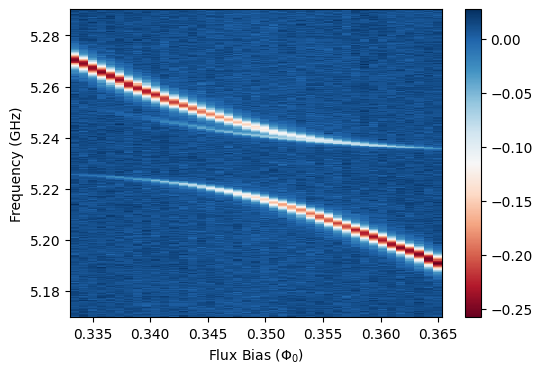

In [7]:
df_avoided_crossing = pd.read_csv(dpath + f'Q{7}-tuning-curve.csv')

freqs_avoided_crossing = np.unique(df_avoided_crossing['frequency'])
currs_avoided_crossing = np.unique(df_avoided_crossing['current'])
phase_avoided_crossing = np.array(df_avoided_crossing['phase']).reshape([len(currs_avoided_crossing), len(freqs_avoided_crossing)])

plt.figure(figsize=(6,4))
fluxs_avoided_crossing = (currs_avoided_crossing - RO_pars[7]['offset_current'])/RO_pars[7]['current_period']
phase_avoided_crossing = phase_avoided_crossing.transpose() - np.mean(phase_avoided_crossing, axis=1)
plt.pcolor(fluxs_avoided_crossing, freqs_avoided_crossing/1e9, np.unwrap(phase_avoided_crossing, axis=0), cmap='RdBu')
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Flux Bias ($\Phi_{0}$)')
plt.show()

# Load PNR Spectroscopy Data

In [8]:
idxs_lowP = np.concatenate([range(4,14), range(51,62)])
idxs_highP = np.array(range(29,50))
len(idxs_lowP), len(idxs_highP)

(21, 21)

In [9]:
phases_PNR = []
freqs_PNR = []
buspows_PNR = []

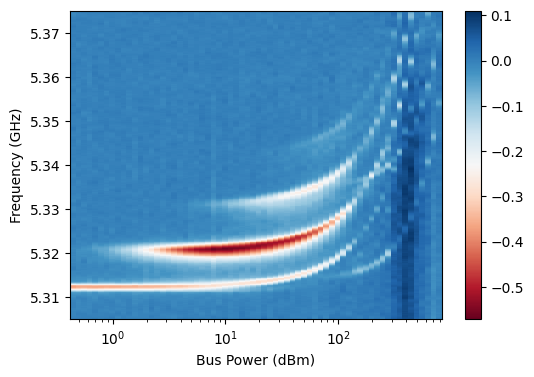

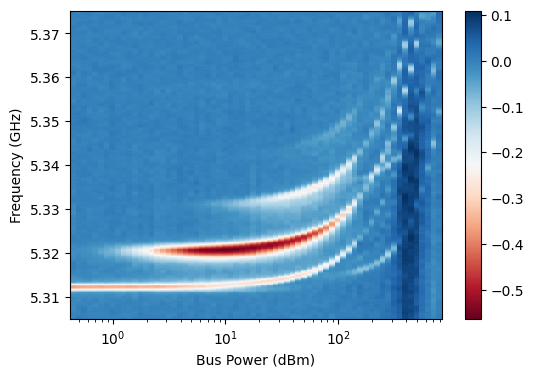

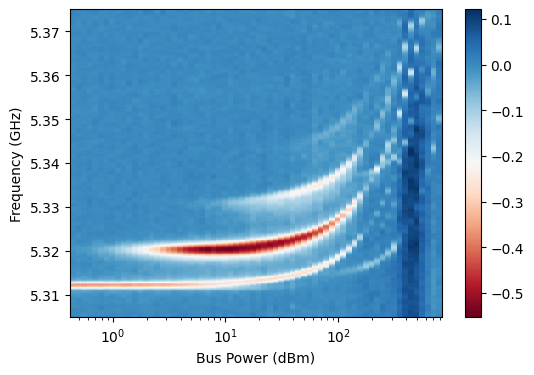

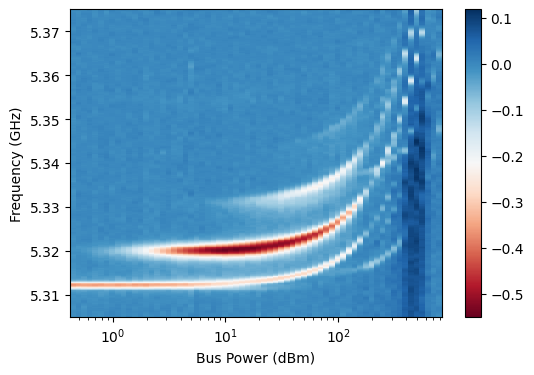

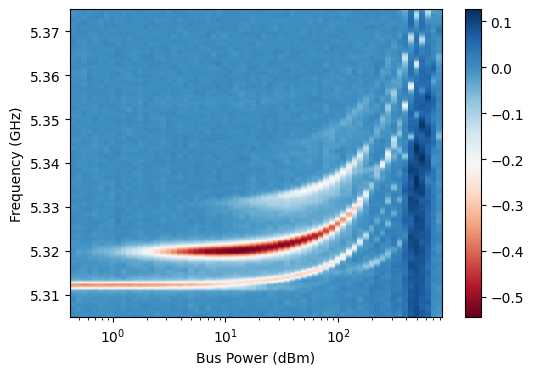

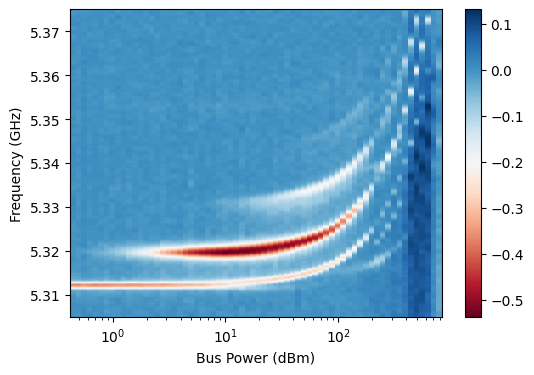

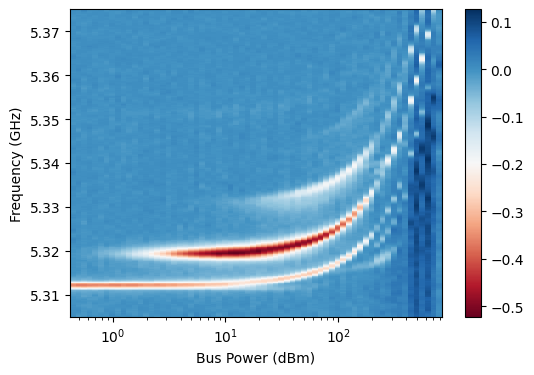

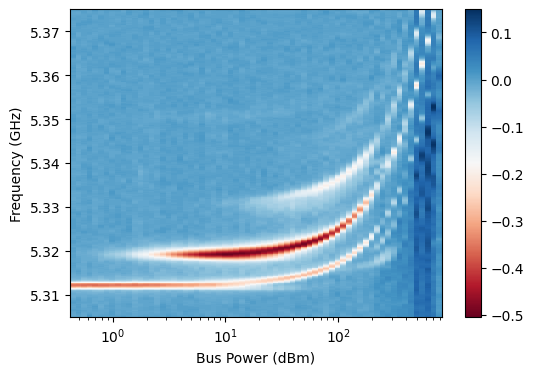

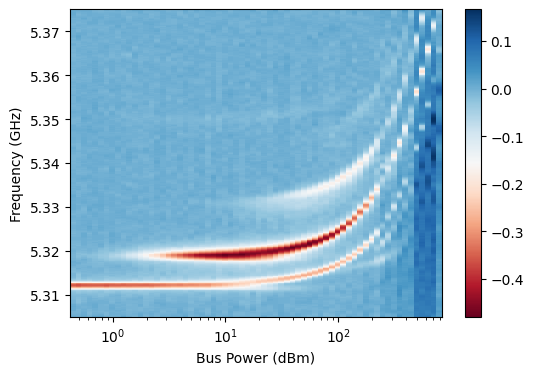

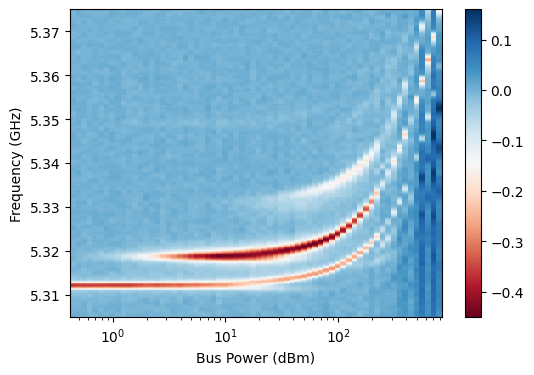

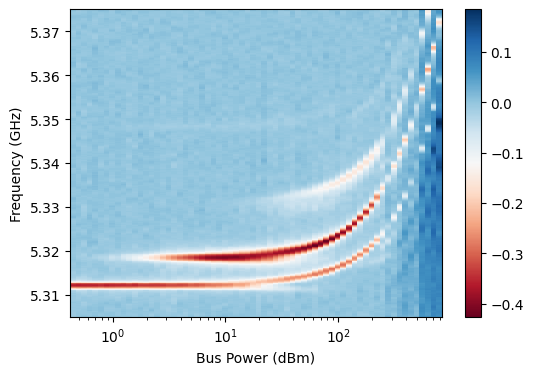

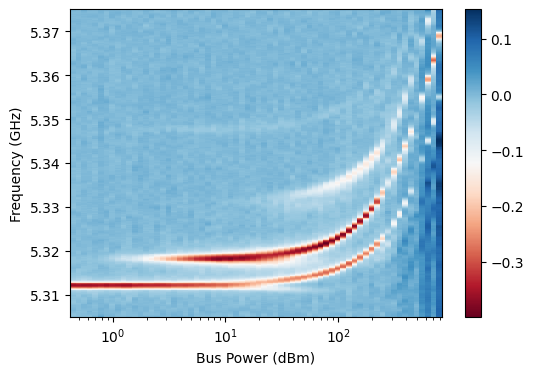

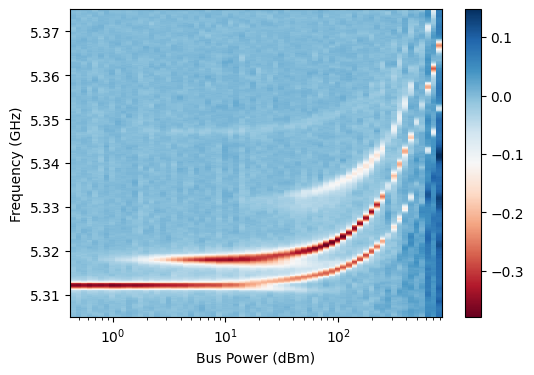

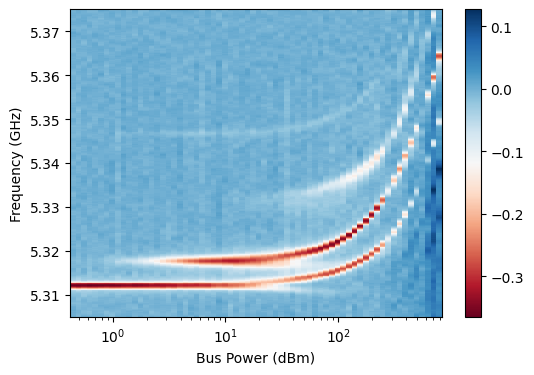

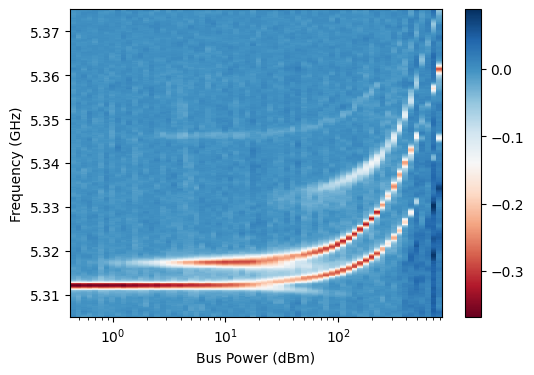

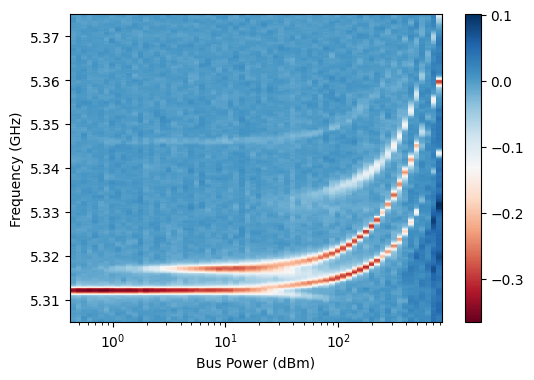

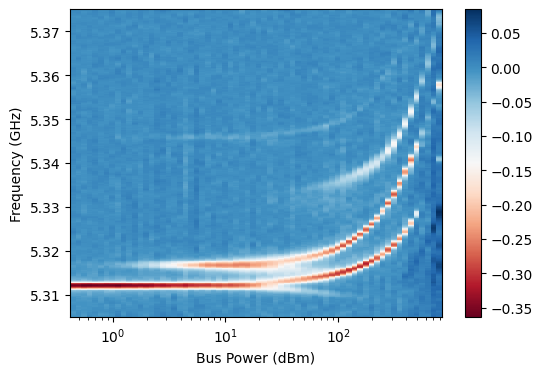

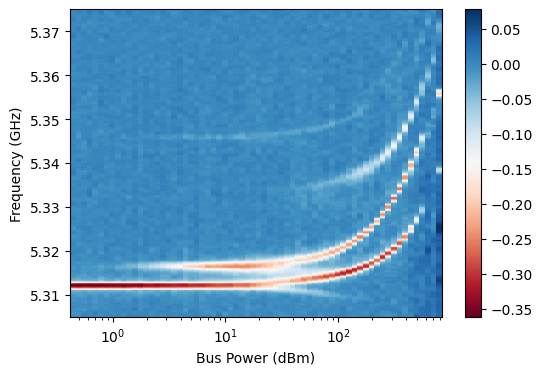

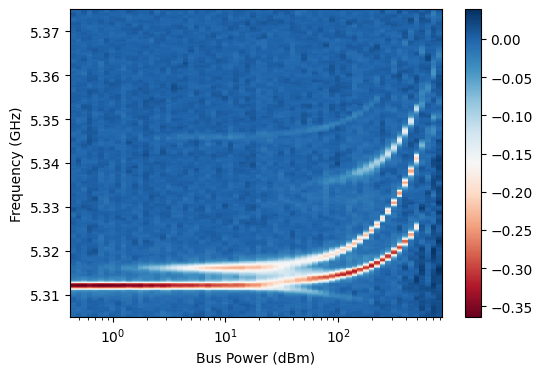

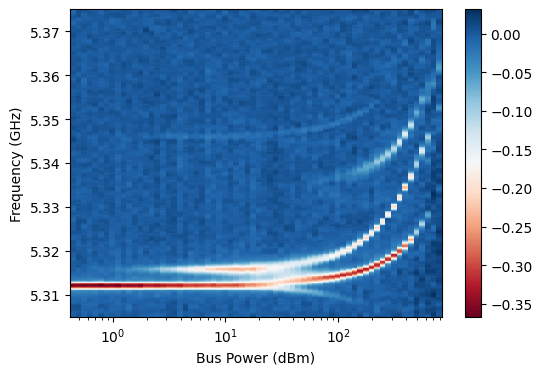

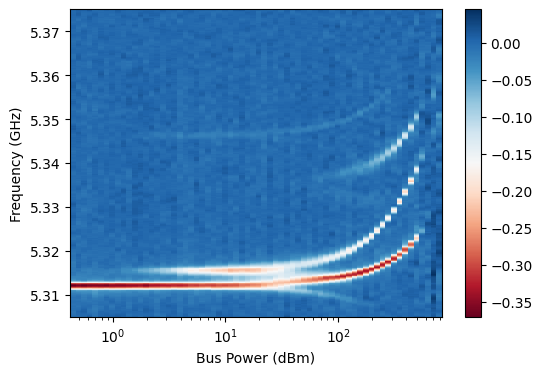

In [10]:
idx_count = 0
for counterL, counterH in zip(idxs_lowP, idxs_highP):
    df = pd.read_csv(dpath + f'Q{4}-pns-power-{counterL}.csv')
    df2 = pd.read_csv(dpath + f'Q{4}-pns-power-{counterH}.csv')

    freqs = np.unique(df['frequency'])
    buspows = np.unique(df['buspower'])
    buspows2 = np.unique(df2['buspower'])
    phase = np.array(df['phase']).reshape([len(buspows), len(freqs)])
    phase2 = np.array(df2['phase']).reshape([len(buspows2), len(freqs)])
    buspows2 = buspows2[-21:] + 21
    phase2 = phase2[-21:,:]
    
    phase = np.concatenate([phase, phase2])
    buspows = np.concatenate([buspows, buspows2])
    
    plt.figure(figsize=(6,4))
    phase = phase.transpose() - np.mean(phase[:, -50:], axis=1)
    phase = np.unwrap(phase)
    phase = scipy.signal.savgol_filter(phase, 11, 3, axis=0)
    plt.pcolor(power_to_kappa(buspows), freqs/1e9, phase, cmap='RdBu')
    plt.xscale('log')
    plt.colorbar()
    plt.ylabel('Frequency (GHz)')
    plt.xlabel('Bus Power (dBm)')
    plt.show()
    if idx_count in [1, 12, 20]:
        phases_PNR.append(phase)
        freqs_PNR.append(freqs)
        buspows_PNR.append(buspows)
    idx_count += 1

In [12]:
delta_curr = np.linspace(20e-6, 0e-6, 21)
q7detune = np.array(qpars[qpars['qubit'] == 7]['a'])*delta_curr

In [88]:
DoverGs = detune7*1e9/(qpars[7]['a']*qpars[7]['b']/2)

In [89]:
DoverGs

array([ 2.59304491,  2.46304461,  2.33304432,  2.20304402,  2.07304373,
        1.94304344,  1.81304314,  1.68304285,  1.55304256,  1.42304226,
        1.29304197,  1.16304167,  1.03304138,  0.90304109,  0.77304079,
        0.6430405 ,  0.51304021,  0.38303991,  0.25303962,  0.12303932,
       -0.00696097])

In [91]:
DoverGs[1], DoverGs[12], DoverGs[20]

(np.float64(2.463044611425418),
 np.float64(1.0330413808048002),
 np.float64(-0.0069609687374646585))

In [13]:
df = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_34.csv')
df1 = pd.read_csv(f'data\\pns-data-0824\\bus-Q4-pns_35.csv')
power = np.array(np.unique(df['power']))
power1 = np.array(np.unique(df1['power']))
powerc = np.concatenate([power, power1])
freqs = np.array(np.unique(df['frequency']))
phase = np.flip(np.unwrap(np.array(df['phase']).reshape([len(power), len(freqs)])), axis=0)
phase1 = np.flip(np.unwrap(np.array(df1['phase']).reshape([len(power1), len(freqs)])), axis=0)
phasec = np.concatenate([phase, phase1])
phasec = phasec.transpose()
phasec = phasec - np.mean(phasec, axis=0)

In [14]:
phases_PNR.append(phasec)
freqs_PNR.append(freqs)
buspows_PNR.append(powerc)

# Load g2 Data and Slice

In [15]:
df = pd.read_csv('fit-results\\g2-N1-exp.csv')
detune_N1 = np.unique(np.array(df['detuning']))
amp_N1 = np.unique(np.array(df['power']))
g2_N1_arr = np.array(df['g2']).reshape([len(detune_N1), len(amp_N1)])

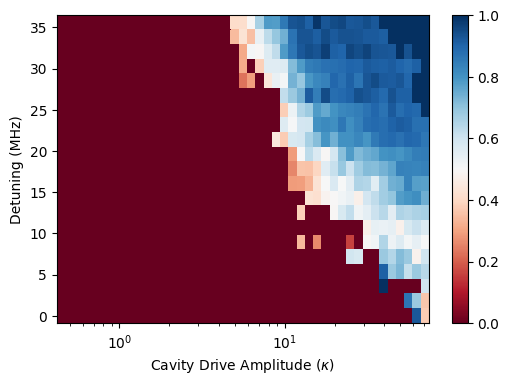

In [19]:
plt.figure(figsize=(6,4))
g2_N1_arr[np.isnan(g2_N1_arr)] = 0
plt.pcolor(power_to_kappa(amp_N1), np.flip(detune_N1)/1e6, g2_N1_arr, cmap='RdBu', vmax=1.0)
plt.xscale('log')
plt.xlabel('Cavity Drive Amplitude ($\kappa$)')
plt.ylabel('Detuning (MHz)')
plt.colorbar()
plt.show()

In [20]:
select_g2_array = np.vstack([g2_N1_arr[:, 17],
                                  g2_N1_arr[:, 22],
                                  g2_N1_arr[:, 27],
                                  g2_N1_arr[:, 34],
                                  g2_N1_arr[:, 41]])

In [21]:
pow_labs = np.array([power_to_kappa(amp_N1)[17], power_to_kappa(amp_N1)[22], power_to_kappa(amp_N1)[27], power_to_kappa(amp_N1)[34], power_to_kappa(amp_N1)[41]])

# Compiled Figure

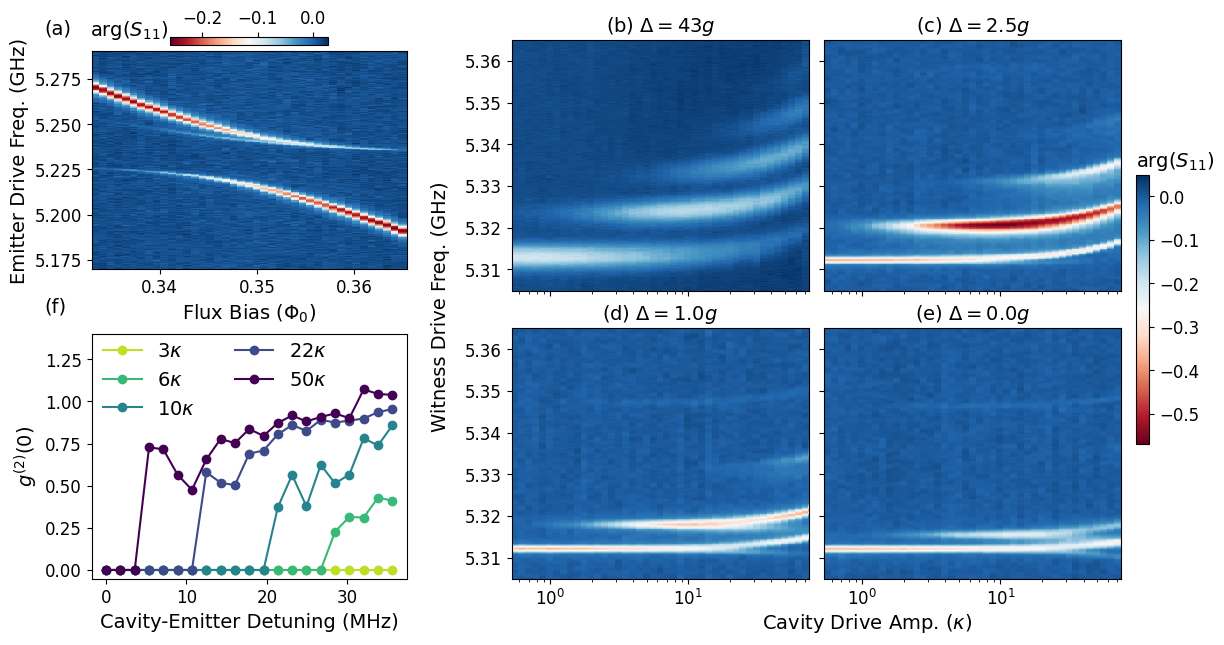

In [25]:
colors = plt.cm.viridis_r(np.linspace(0.1, 1.0, 5))
fig = plt.figure(figsize=(13, 7))
subfigs = fig.subfigures(1, 2, wspace=-0.08, width_ratios=(3,7))
subps = subfigs[0].subplots(2,1, height_ratios=(5, 5))
pc = subps[0].pcolor(fluxs_avoided_crossing, freqs_avoided_crossing/1e9, np.unwrap(phase_avoided_crossing, axis=0), cmap='RdBu', rasterized='auto')
subps[0].set_xlabel('Flux Bias ($\Phi_{0}$)', fontsize=14)
subps[0].set_ylabel('Emitter Drive Freq. (GHz)', fontsize=14)
for i in range(5):
    subps[1].plot(q7detune/1e6, select_g2_array[i,:], 'o-', color=colors[i], label=f'{pow_labs[i]:0.0f}$\kappa$')
subps[1].legend(ncols=2, prop={'size': 14}, frameon=False, loc=2, bbox_to_anchor=(-0.02,1.04))
subps[1].set_ylim(None, 1.4)
subps[1].set_ylabel('$g^{(2)}(0)$', fontsize=14)
subps[1].set_xlabel('Cavity-Emitter Detuning (MHz)', fontsize=14) 
subfigs[1].subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.35)
cb = subfigs[0].colorbar(pc, location='top', shrink=0.5, anchor=(0.5, 1.1), pad=-0.1)
cb.ax.set_ylabel('$\mathrm{arg}(S_{11})$', rotation=0, labelpad=30, fontsize=14)
cb.ax.tick_params(labelsize=12)
subps[0].annotate("(a)", xy=(-0.15, 1.15), xycoords='axes fraction', fontsize=14, ha='left', va='top')
subps[1].annotate("(f)", xy=(-0.15, 1.15), xycoords='axes fraction', fontsize=14, ha='left', va='top')
subps[0].tick_params(labelsize=12)
subps[1].tick_params(labelsize=12)

subps = subfigs[1].subplots(2,2, sharex=True, sharey=True)
subps[0,0].pcolor(power_to_kappa(buspows_PNR[3]), freqs_PNR[3]/1e9, phases_PNR[3], cmap='RdBu', vmin=-0.57, vmax=0.05, rasterized='auto')
subps[0,0].set_xlim(None, 75)
subps[0,0].set_ylim(None, 5.365)
subps[0,0].set_title('(b) $\Delta=43g$', fontsize=14)
subps[0,1].pcolor(power_to_kappa(buspows_PNR[0])[:51], freqs_PNR[0]/1e9, phases_PNR[0][:,:51], cmap='RdBu', vmin=-0.57, vmax=0.05, rasterized='auto')
subps[0,1].set_title('(c) $\Delta=2.5g$', fontsize=14)
subps[0,1].set_xscale('log')
subps[1,0].pcolor(power_to_kappa(buspows_PNR[1])[:51], freqs_PNR[1]/1e9, phases_PNR[1][:,:51], cmap='RdBu', vmin=-0.57, vmax=0.05, rasterized='auto')
subps[1,0].set_title('(d) $\Delta=1.0g$', fontsize=14)
im = subps[1,1].pcolor(power_to_kappa(buspows_PNR[2])[:51], freqs_PNR[2]/1e9, phases_PNR[2][:,:51], cmap='RdBu', vmin=-0.57, vmax=0.05, rasterized='auto')
subps[1,1].set_title('(e) $\Delta=0.0g$', fontsize=14)
subfigs[1].supylabel('Witness Drive Freq. (GHz)', fontsize=14, x=0.04)
subfigs[1].supxlabel('Cavity Drive Amp. ($\kappa$)', fontsize=14, y=0.03)
subfigs[1].subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.15)
cb = subfigs[1].colorbar(im, ax=subps.ravel().tolist(), shrink=0.5, pad=0.02)
cb.ax.set_title('$\mathrm{arg}(S_{11})$', fontsize=14, loc='left')
cb.ax.tick_params(labelsize=12)
subps[0,0].tick_params(labelsize=12)
subps[0,1].tick_params(labelsize=12)
subps[1,0].tick_params(labelsize=12)
subps[1,1].tick_params(labelsize=12)
# fig.savefig('figures\\fig2-detuning-v2.pdf', bbox_inches='tight')